## **Fundamentos e Técnicas em Ciências de Dados**

#### Motivação: 
 OBS.: Estudo realizado para fins didáticos, projeto de conclusão da disciplina "Fundamentos e  Técnicas em Ciências de Dados - UFRN/EAJ"
 
Os sistemas de notificação de óbitos também passaram a ser sobrecarregados, principalmente para registrar os óbitos por Síndrome Respiratória Aguda Grave (SRAG), que é reconhecida como a principal síndrome clínica relacionada à covid-19.

A partir de meados de março de 2020, passaram a ser divulgados também os óbitos oriundos da covid-19, os quais, devido à sobreposição de critérios e ao fato de nem sempre os infectados apresentarem toda a sintomatologia para definição de casos suspeitos, eram enquadrados como SG (Síndrome Gripal) ou SRAG. Ou seja: enquanto nos anos anteriores apenas havia a notificação por SRAG, em 2020 eram apresentados para cada data de ocorrência os óbitos totais por SRAG e os que, entre eles, tinham como causa principal a covid-19.

Para afirmar que esse óbito foi por covid-19, era preciso que houvesse sido realizado o teste de identificação e este ter dado positivo.


A notificação de óbitos por SRAG é feita pelas vigilâncias epidemiológicas de cada município no Sivep-Gripe (Sistema de Vigilância Epidemiológica da Gripe), disponível na plataforma [OpenDataSUS](https://opendatasus.saude.gov.br/dataset) do Ministério da Saúde.

Este estudo tem como objetivo identificar a sub-notificação da covid-19.

 **Professor**: Josenalde Barbosa UFRN/EAJ

 - Francisco Gomes Cordeiro Neto



 


### **Bibliotecas Básicas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from pandas.plotting import andrews_curves

### **Pré - Processamento**

Carremento do google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### OpenDataSUS
SRAG 2019 - Banco de Dados de Síndrome Respiratória Aguda Grave
Vigilância de Síndrome Respiratória Aguda Grave (SRAG)

In [ ]:
pd_n_sarg_2019 = pd.read_csv('/content/drive/MyDrive/TADS - UFRN/2020.2/data_science/trab03/dataset/sarg_2019.csv',low_memory=False, encoding='ISO-8859-1', delimiter=';', error_bad_lines=False)

In [ ]:
pd_n_sarg_2019.sample(3)


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,...,CO_LAB_IF,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,LAB_PCR,CO_LAB_PCR,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,OBSERVA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO
36670,02/08/2019,31,29/07/2019,31,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL SAMARITANO,2080818,M,02/07/1954,65,3,3065,6,9.0,NaN,9.0,BRASIL,1.0,SP,1331.0,SAO PAULO,355030.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0,2.0,1.0,CEFALEIA EM PESO FRONTAL,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,9.0,NaN,NaN,NaN,28/08/2019,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10040,23/04/2019,17,21/04/2019,17,PE,1,1497.0,RECIFE,261160,IMIP,434,M,24/01/2019,2,2,2002,6,4.0,NaN,5.0,BRASIL,1.0,PE,1497.0,RECIFE,261160.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,...,2712075.0,2.0,24/04/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAB CENTRAL DE SAUDE PUB DR MILTON BEZERRA SOBRAL,2712075.0,4.0,NaN,1.0,1.0,30/04/2019,06/05/2019,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39607,20/09/2019,38,18/09/2019,38,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL SAO PAULO HOSPITAL DE ENSINO DA UNIFE...,2077485,M,07/01/1969,50,3,3050,6,NaN,NaN,NaN,BRASIL,1.0,SP,1331.0,SAO PAULO,355030.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,NaN,NaN,...,NaN,2.0,19/09/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,15/10/2019,NaN,20/09/2019,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
evolucao_caso = {1:'Cura', 2:'Óbito', 
                 3:'Óbito por outras causas', 9:'Ignorado'}
classificacao_final = {1:'SRAG por influenza', 2:'SRAG por outro vírus respiratório',
                       3:'SRAG por outro agente etiológico',
                       4:'SRAG não especificado', 5:'SRAG por COVID-19'}

Evolução dos Casos com NaN na feature EVOLUCAO **não** tratados

In [ ]:
pd_n_sarg_2019.groupby('EVOLUCAO').size().sort_values()

EVOLUCAO
9.0     1384
2.0     5370
1.0    38646
dtype: int64

In [ ]:
# Verifica se tem NaN na target "EVOLUCAO"
hasNan = pd_n_sarg_2019['EVOLUCAO'].isnull().values.any()
print(hasNan)

True


In [ ]:
# Verifica se tem NaN na target "CLASSI_FIN"
hasNan = pd_n_sarg_2019['CLASSI_FIN'].isnull().values.any()
print(hasNan)

True


In [ ]:
pd_n_sarg_2019.loc[(pd_n_sarg_2019.EVOLUCAO.isnull()), 'EVOLUCAO'] = 9
pd_n_sarg_2019.loc[(pd_n_sarg_2019.CLASSI_FIN.isnull()), 'CLASSI_FIN'] = 1
pd_n_sarg_2019['EVOLUCAO'] = pd_n_sarg_2019['EVOLUCAO'].apply(lambda x: evolucao_caso[x])
pd_n_sarg_2019['CLASSI_FIN'] = pd_n_sarg_2019['CLASSI_FIN'].apply(lambda x: classificacao_final[x])

In [ ]:
# Verifica se tem NaN na target "EVOLUCAO"
hasNan = pd_n_sarg_2019['EVOLUCAO'].isnull().values.any()
print(hasNan)

False


In [ ]:
# Verifica se tem NaN na target "CLASSI_FIN"
hasNan = pd_n_sarg_2019['CLASSI_FIN'].isnull().values.any()
print(hasNan)

False


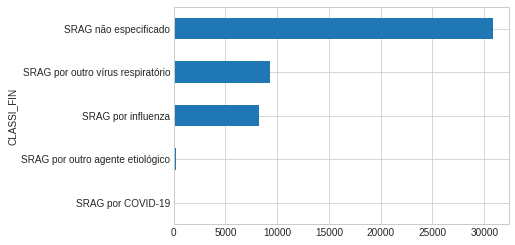

In [ ]:
pd_n_sarg_2019.groupby('CLASSI_FIN').size().sort_values().plot(kind='barh')

In [ ]:
pd_n_sarg_2019.groupby('EVOLUCAO').size().sort_values()

EVOLUCAO
Ignorado     4512
Óbito        5370
Cura        38646
dtype: int64

### OpenDataSUS
SRAG 2020 - Banco de Dados de Síndrome Respiratória Aguda Grave - incluindo dados da COVID-19
Vigilância de Síndrome Respiratória Aguda Grave (SRAG)

In [ ]:
pd_n_sarg_2020 = pd.read_csv('/content/drive/MyDrive/TADS - UFRN/2020.2/data_science/trab03/dataset/sarg_2020.csv', encoding='ISO-8859-1', delimiter=';', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,60,62,63,64,92,94,106,108,115,117,118,119,123) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Verifica se tem NaN na target "EVOLUCAO"
hasNan = pd_n_sarg_2020['EVOLUCAO'].isnull().values.any()
print(hasNan)

False


In [ ]:
# Verifica se tem NaN na target "CLASSI_FIN"
hasNan = pd_n_sarg_2020['CLASSI_FIN'].isnull().values.any()
print(hasNan)

True


In [ ]:
evolucao_caso = {1:'Cura', 2:'Óbito', 
                 3:'Óbito por outras causas', 9:'Ignorado'}
classificacao_final = {1:'SRAG por influenza', 2:'SRAG por outro vírus respiratório',
                       3:'SRAG por outro agente etiológico',
                       4:'SRAG não especificado', 5:'SRAG por COVID-19'}

In [ ]:
pd_n_sarg_2020.groupby('EVOLUCAO').size().sort_values()

EVOLUCAO
3.0     14096
9.0     30566
2.0    301804
1.0    701374
dtype: int64

In [ ]:
pd_n_sarg_2020.loc[(pd_n_sarg_2020.EVOLUCAO.isnull()), 'EVOLUCAO'] = 9
pd_n_sarg_2020.loc[(pd_n_sarg_2020.CLASSI_FIN.isnull()), 'CLASSI_FIN'] = 1
pd_n_sarg_2020['EVOLUCAO'] = pd_n_sarg_2020['EVOLUCAO'].apply(lambda x: evolucao_caso[x])
pd_n_sarg_2020['CLASSI_FIN'] = pd_n_sarg_2020['CLASSI_FIN'].apply(lambda x: classificacao_final[x])

In [ ]:
pd_n_sarg_2020.sample(5)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,...,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
136921,04/10/2020,41,25/09/2020,39,RJ,NaN,NaN,ANGRA DOS REIS,330010,HOSPITAL E MATERNIDADE CODRATO DE VILHENA,2280868,F,13/12/1943,76,3,3076,5,4.0,NaN,NaN,BRASIL,1,RJ,NaN,NaN,ANGRA DOS REIS,330010.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,...,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,04/10/2020,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348342,07/09/2020,37,31/08/2020,36,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSP DO SERV PUB MUNICIPAL HSPM,2752077,F,17/11/1946,73,3,3073,6,1.0,NaN,9.0,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,2.0,NaN,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN,...,2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,1.0,1.0,1.0,NaN,07/09/2020,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,15/09/2020,1.0,NaN,15/09/2020,1.0,1.0,4.0
63547,20/12/2020,52,19/12/2020,51,MG,DIAMANTINA,1450.0,DIAMANTINA,312160,SANTA CASA DE CARIDADE,2135132,M,27/01/1968,52,3,3052,6,1.0,NaN,9.0,BRASIL,1,MG,DIAMANTINA,1450.0,SENADOR MODESTINO GONCALVES,316590.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,1.0,NaN,20/12/2020,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147400,23/11/2020,48,11/11/2020,46,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,HOSPITAL OTOCLINICA,3001113,F,29/11/1957,62,3,3062,5,9.0,NaN,9.0,BRASIL,1,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,...,2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,2.0,2.0,2.0,1.0,NaN,05/11/2020,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556474,27/09/2020,40,23/09/2020,39,RS,017 CRS,1604.0,IJUI,431020,HOSPITAL DE CARIDADE DE IJUI,2261057,F,21/09/1976,44,3,3044,5,1.0,NaN,2.0,BRASIL,1,RS,017 CRS,1604.0,IJUI,431020.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Verifica se tem NaN na target "EVOLUCAO"
hasNan = pd_n_sarg_2020['EVOLUCAO'].isnull().values.any()
print(hasNan)

False


In [ ]:
# Verifica se tem NaN na target "CLASSI_FIN"
hasNan = pd_n_sarg_2020['CLASSI_FIN'].isnull().values.any()
print(hasNan)

False


In [ ]:
pd_n_sarg_2020.groupby('EVOLUCAO').size().sort_values()

EVOLUCAO
Óbito por outras causas     14096
Ignorado                   174530
Óbito                      301804
Cura                       701374
dtype: int64

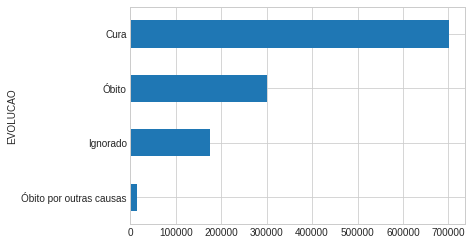

In [ ]:
pd_n_sarg_2020.groupby('EVOLUCAO').size().sort_values().plot(kind='barh')

Identificação de todos o casos identificado de SARG em 2020 - Incluindo os Recuperados e os Óbitos

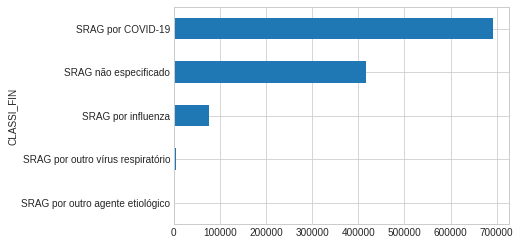

In [ ]:
pd_n_sarg_2020.groupby('CLASSI_FIN').size().sort_values().plot(kind='barh')

Todos os Óbitos por SARG em 2020

In [ ]:
pd_n_obito_sarg_2020 = pd_n_sarg_2020.query('EVOLUCAO == "Óbito"')
n_obito_sarg_2020 = pd_n_obito_sarg_2020.query('EVOLUCAO == "Óbito"')['EVOLUCAO'].value_counts()
print(n_obito_sarg_2020)

Óbito    301804
Name: EVOLUCAO, dtype: int64


Diferença do número de óbitos por SARG em 2020 (incluindo COVID) em compração a 2019

In [ ]:
diff_sarg_2020_2019 = pd_n_sarg_2020.query('EVOLUCAO == "Óbito"')['EVOLUCAO'].count() - pd_n_sarg_2019.query('EVOLUCAO == "Óbito"')['EVOLUCAO'].count()
print("Diferença do óbitos por SARG entre os anos de 2020-2019 \nÓbitos:",diff_sarg_2020_2019)

Diferença do óbitos por SARG entre os anos de 2020-2019 
Óbitos: 296434


In [ ]:
dict_result['Diferença de Óbitos 2020-2019'] = diff_sarg_2020_2019
print(dict_result)

{'Diferença de Óbitos 2020-2019': 296434}


Óbitos por COVID-19 em 2020

In [ ]:
n_obito_covid_2020 = pd_n_obito_sarg_2020.query('CLASSI_FIN == "SRAG por COVID-19"')['CLASSI_FIN'].count()
print(n_obito_covid_2020)

219843


Óbitos por SRAG, sem confirmação de covid-19 em 2020:

In [ ]:
n_obito_sarg_sem_covid_2020 = n_obito_sarg_2020 - n_obito_covid_2020
print("Óbitos por SRAG, sem confirmação de covid-19 em 2020:", n_obito_sarg_sem_covid_2020)

Óbitos por SRAG, sem confirmação de covid-19 em 2020: Óbito    81961
Name: EVOLUCAO, dtype: int64


Estimativa de Sub-notificação de COVID-19 em 2020.
Diferença dos óbitos totais por SARG que **NÃO** foram identificados por **COVID-19**

In [ ]:
print(diff_sarg_2020_2019 - n_obito_covid_2020)

76591


In [ ]:
subnotificacao = ((diff_sarg_2020_2019 - n_obito_covid_2020) / (n_obito_covid_2020))*100
print("Sub-notificação", subnotificacao,"%")

Sub-notificação 34.83895325300328 %


Função para calcular a Sub-Notificação

In [ ]:
def calculaSubnotificacao(covid):
  return print("Sub notificação", covid+(covid*(subnotificacao)/100))

In [ ]:
calculaSubnotificacao(n_obito_covid_2020)

Sub notificação 296434.0


### OpenDataSUS
SRAG 2021 - Banco de Dados de Síndrome Respiratória Aguda Grave - incluindo dados da COVID-19
Vigilância de Síndrome Respiratória Aguda Grave (SRAG)

In [ ]:
df_n_sarg_2021 = pd.read_csv('/content/drive/MyDrive/TADS - UFRN/2020.2/data_science/trab03/dataset/sarg_2021.csv', encoding='ISO-8859-1', delimiter=';', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,18,60,62,63,64,92,94,106,108,115,117,118,119,123,144) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_n_sarg_2021.groupby('EVOLUCAO').size().sort_values()

EVOLUCAO
3.0      4906
9.0     17116
2.0    150248
1.0    230198
dtype: int64

In [ ]:
evolucao_caso = {1:'Cura', 2:'Óbito', 
                 3:'Óbito por outras causas', 9:'Ignorado'}
classificacao_final = {1:'SRAG por influenza', 2:'SRAG por outro vírus respiratório',
                       3:'SRAG por outro agente etiológico',
                       4:'SRAG não especificado', 5:'SRAG por COVID-19'}

In [ ]:
df_n_sarg_2021.loc[(df_n_sarg_2021.EVOLUCAO.isnull()), 'EVOLUCAO'] = 9
df_n_sarg_2021.loc[(df_n_sarg_2021.CLASSI_FIN.isnull()), 'CLASSI_FIN'] = 3
df_n_sarg_2021['EVOLUCAO'] = df_n_sarg_2021['EVOLUCAO'].apply(lambda x: evolucao_caso[x])
df_n_sarg_2021['CLASSI_FIN'] = df_n_sarg_2021['CLASSI_FIN'].apply(lambda x: classificacao_final[x])

In [ ]:
df_n_sarg_2021[:-1]

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,...,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
0,05/01/2021,1,04/01/2021,1,CE,11 CRES SOBRAL,1521.0,SOBRAL,231290,HOSPITAL REGIONAL NORTE,6848710,M,30/06/1956,64,3,3064,6,9,NaN,NaN,BRASIL,1,CE,11 CRES SOBRAL,1521.0,SOBRAL,231290.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14/04/2021,15,12/04/2021,15,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740,HOSPITAL DA BAHIA,3827992,M,13/06/1933,87,3,3087,6,4,NaN,9.0,BRASIL,1,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740.0,1.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04/01/2021,1,03/01/2021,1,MS,EX ARS DE CAMPO GRANDE,1975.0,CAMPO GRANDE,500270,HOSPITAL SAO JULIAO CEDAMI CASA VOVO TULIA,9733,M,07/10/1924,96,3,3096,6,1,NaN,1.0,BRASIL,1,MS,EX ARS DE CAMPO GRANDE,1975.0,CAMPO GRANDE,500270.0,1.0,NaN,9.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,04/01/2021,1.0,NaN,04/01/2021,2.0,2.0,NaN
3,05/01/2021,1,05/01/2021,1,MG,BELO HORIZONTE,1449.0,BELO HORIZONTE,310620,HOSPITAL SOFIA FELDMAN,26794,M,26/11/1988,32,3,3032,6,1,NaN,NaN,BRASIL,1,MG,BELO HORIZONTE,1449.0,BETIM,310670.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/01/2021,1,04/01/2021,1,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,HOSPITAL PILAR,3000885,M,19/10/1928,92,3,3092,6,1,NaN,9.0,BRASIL,1,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,2.0,2.0,2.0,1.0,NaN,05/01/2021,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605847,17/04/2021,15,03/04/2021,13,RO,VI DRS PORTO VELHO,1483.0,PORTO VELHO,110020,HOSPITAL DE CAMPANHA DE RONDONIA,213837,F,01/03/1970,51,3,3051,5,4,NaN,4.0,BRASIL,1,RO,VI DRS PORTO VELHO,1483.0,PORTO VELHO,110020.0,1.0,NaN,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,142105,GERENTE ADMINISTRATIVO,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,05/04/2021,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605848,04/04/2021,14,01/04/2021,13,RJ,NaN,NaN,SAO GONCALO,330490,HOSPITAL FRANCISCANO,113891,M,01/04/1962,59,3,3059,6,4,NaN,1.0,BRASIL,1,RJ,NaN,NaN,SAO GONCALO,330490.0,1.0,NaN,2.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Evolução dos Casos identificados por SARG

In [ ]:
# Verifica se tem NaN na target "EVOLUCAO"
hasNan = df_n_sarg_2021['EVOLUCAO'].isnull().values.any()
print(hasNan)

False


In [ ]:
# Verifica se tem NaN na target "CLASSI_FIN"
hasNan = df_n_sarg_2021['CLASSI_FIN'].isnull().values.any()
print(hasNan)

False


Soma do óbitos por SRAG no ano de 2021, incluindo COVID-19

In [ ]:
df_n_sarg_2021.groupby('EVOLUCAO').size().sort_values()

EVOLUCAO
Óbito por outras causas      4906
Óbito                      150248
Ignorado                   220501
Cura                       230198
dtype: int64

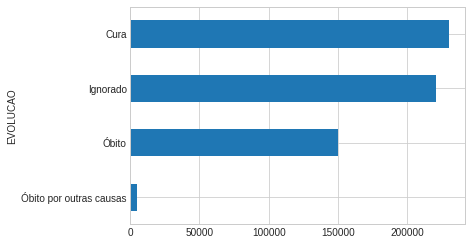

In [ ]:
df_n_sarg_2021.groupby('EVOLUCAO').size().sort_values().plot(kind='barh')

Todos os óbitos por SARG em 2021

In [ ]:
df_n_obito_sarg_2021 = df_n_sarg_2021.query('EVOLUCAO == "Óbito"')
n_obito_sarg_2021 = df_n_obito_sarg_2021.query('EVOLUCAO == "Óbito"')['EVOLUCAO'].value_counts()
print("SARG EM 2021", n_obito_sarg_2021)


SARG EM 2021 Óbito    150248
Name: EVOLUCAO, dtype: int64


Óbitos por SRAG, sem confirmação de covid-19 em 2021:

In [ ]:
n_obito_sarg_sem_covid_2021 = n_obito_sarg_2021 - n_obito_covid_2021
print("Óbitos por SRAG, sem confirmação de covid-19 em 2021:", n_obito_sarg_sem_covid_2021)

Óbitos por SRAG, sem confirmação de covid-19 em 2021: Óbito    16034
Name: EVOLUCAO, dtype: int64


Óbitos por SARG com confirmação por COVID-19 em 2021

In [ ]:
n_obito_covid_2021 = df_n_obito_sarg_2021.query('CLASSI_FIN == "SRAG por COVID-19"')['CLASSI_FIN'].count()
print("SARG com confirmação por COVID-19 em 2021:", n_obito_covid_2021)

SARG com confirmação por COVID-19 em 2021: 134214


Cálcula Sub-notificação COVID-19 ano 2021

In [ ]:
calculaSubnotificacao(n_obito_covid_2021)

180972.75271898584

### Cálculo da subnotificação de óbitos por covid-19

Exemplificando, com os valores divulgados pelo OpenDataSUS:
* 2019 06/01/2019 até 29/10/2019.
* 2020 dia 29/10/2020.
* 2021 dia 10/04/2021. 

Obtém-se:

* Óbitos por SRAG em 2019: 5.370
* Óbitos por SRAG em 2020: 301.804
* Óbitos por SRAG, com confirmação de covid-19, em 2020: 219.843
* Óbitos por SRAG, sem confirmação de covid-19 em 2020: 81.961


Tomando como base os 5.370 óbitos por SRAG em 2019, tem-se, em 2020, 76.591 óbitos a mais que 2019 por SRAG que não foram confirmados por covid-19. Portanto, esses óbitos poderão ser sim óbitos por covid-19 que não foram notificados devidamente.
